# Breast Cancer Classification

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split

## Data Collection and Processing.

In [26]:
dataset = sklearn.datasets.load_breast_cancer()

In [27]:
# print(dataset)

In [28]:
# loading the data to a data frame
data_frame = pd.DataFrame(dataset.data, columns = dataset.feature_names)
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
# adding the 'target' column to the data frame
data_frame['label'] = dataset.target

# print last 5 rows of the dataframe
data_frame.tail()

# number of rows and columns in the dataset
data_frame.shape

# getting some information about the data
data_frame.info()

# checking for missing values
data_frame.isnull().sum()

# statistical measures about the data
data_frame.describe()

# checking the distribution of Target Varibale
data_frame['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

label
1    357
0    212
Name: count, dtype: int64

In [30]:
# 1 --> Benign

# 0 --> Malignant

data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [31]:
# Separating the features into the dependent and the independent variable.
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

print(X)

print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

## Splitting the data into training data & Testing data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


## Standardize the data
This is the important step for the deep learning model to maximise the accuracy of the model.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

## Building the Neural Network

In [48]:
# Libraries required for the deep learning model.
import tensorflow as tf
#  Its just like the random_state 
tf.random.set_seed(3)
from tensorflow import keras
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers import Dense

In [56]:
# setting up the layers of neural network.

#  First way to do it. ( Pyramid pattern of the neural network is best )
# model = Sequential([
#     # use for single dimensional array.f
#     Flatten(input_shape=(30,)),   # Converts the input data into the 1D vector of corresponding elements
#     Dense(20, activation="relu"),  # Dense layer with 20 neurons
#     Dense(10, activation="relu"),    # Dense layer with 10 neurons
#     Dense(2, activation="sigmoid")    # Output layer with 2classes for classification
# ])

#  Second way to do it.
model = Sequential()
model.add(Dense(30, input_dim = 30, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="sigmoid"))
    

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
#  we need to compile that model.
model.compile(optimizer='adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [52]:
#  Training the neural network.
# model.fit(X_train_std, Y_train, validation_split=0.2,epochs = 10)
hist = model.fit(X_train_std, Y_train, validation_split=0.2, epochs=15)

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.6235 - loss: 0.6642 - val_accuracy: 0.8791 - val_loss: 0.5687
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8957 - loss: 0.5254 - val_accuracy: 0.9121 - val_loss: 0.4358
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9326 - loss: 0.4051 - val_accuracy: 0.9231 - val_loss: 0.3196
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9457 - loss: 0.3006 - val_accuracy: 0.9231 - val_loss: 0.2312
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9490 - loss: 0.2211 - val_accuracy: 0.9451 - val_loss: 0.1753
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9611 - loss: 0.1686 - val_accuracy: 0.9451 - val_loss: 0.1427
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9699 - loss: 0.1358 - val_accuracy: 0.9451 - val_loss: 0.1224
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9798 - loss: 0.1151 - val_accuracy: 0.9451 - v

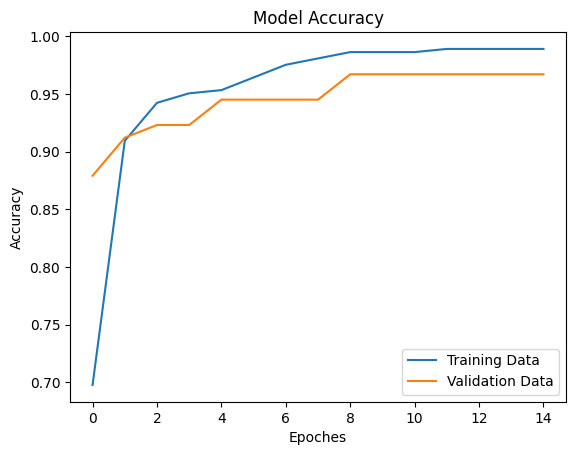

In [53]:
#  Visualizing the accuracy and the loss.
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoches")

plt.legend(["Training Data", "Validation Data"], loc = 'lower right')

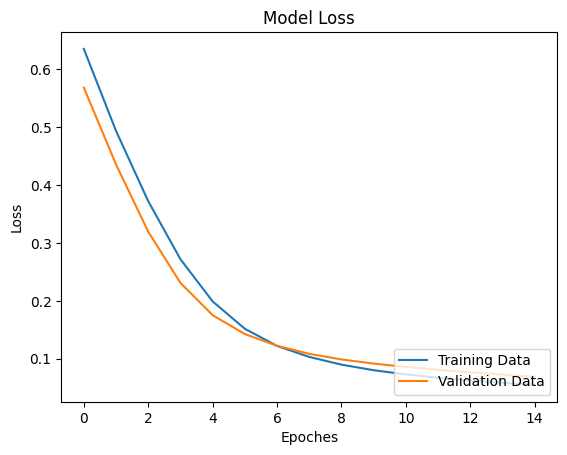

In [54]:
#  Visualizing the loss and the loss.
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoches")

plt.legend(["Training Data", "Validation Data"], loc = 'lower right')

In [55]:
# loss, accuracy = model.evaluate(X_test_std, Y_test)
model.evaluate(X_test_std, Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9738 - loss: 0.0893


[0.08799351006746292, 0.9736841917037964]

In [41]:
# Thers is a different kind of the predictive system in the deep learning.
y_test_pred = model.predict(X_test_std)                                   

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [42]:
# print(y_test_pred.shape)
# print(y_test_pred[0])

#  It will return the probability for coming the 0 or the 1.

In [43]:
print(X_test_std.shape)
print(y_test_pred.shape)

(114, 30)
(114, 2)


In [44]:
# As we have the output on the basis of the probability we need to convert into the 0 or 1 format
y_pred_labels = [np.argmax(i) for i in y_test_pred]
print(y_pred_labels)

#  Now we have the output labels for the test data.

[1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [45]:
X_test_std[34]

array([ 1.62126819,  1.31227929,  1.59385357,  1.52998497,  0.383989  ,
        1.06363702,  2.17088915,  1.73519224,  1.4804356 , -0.23708206,
        0.35021158, -0.02573454, -0.02490135,  0.51301685, -0.64579986,
        0.37260162,  0.63542468, -0.20375651, -0.58771118, -0.21613844,
        1.35976908,  1.25316238,  1.27597733,  1.30006785, -0.18579721,
        0.85288128,  1.43839877,  0.91250179,  0.68404906,  0.04448001])

## Build the Model Prediction System.

In [46]:
# new_data = np.array([-0.04462793, -1.41612656, -0.05903514, -0.16234067,  2.0202457 ,
#        -0.11323672,  0.18500609,  0.47102419,  0.63336386,  0.26335737,
#         0.53209124,  2.62763999,  0.62351167,  0.11405261,  1.01246781,
#         0.41126289,  0.63848593,  2.88971815, -0.41675911,  0.74270853,
#        -0.32983699, -1.67435595, -0.36854552, -0.38767294,  0.32655007,
#        -0.74858917, -0.54689089, -0.18278004, -1.23064515, -0.6268286])

new_data = np.array([1.62126819,  1.31227929,  1.59385357,  1.52998497,  0.383989  ,
        1.06363702,  2.17088915,  1.73519224,  1.4804356 , -0.23708206,
        0.35021158, -0.02573454, -0.02490135,  0.51301685, -0.64579986,
        0.37260162,  0.63542468, -0.20375651, -0.58771118, -0.21613844,
        1.35976908,  1.25316238,  1.27597733,  1.30006785, -0.18579721,
        0.85288128,  1.43839877,  0.91250179,  0.68404906,  0.04448001])

#  we need to convert the data into the 2D form .
reshaped_array = new_data.reshape(1,-1)

prediction = model.predict(reshaped_array)

prediction
# if np.argmax(prediction) == 1:
#     print("The Tumor is Malignant")
# else:
#     print("The Tumor is Benign")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


array([[0.9803355 , 0.03118782]], dtype=float32)